In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Zaczniemy od bardzo prostego przypadku nieskończonej studni potencjału, takiej jak na rysunku poniżej.

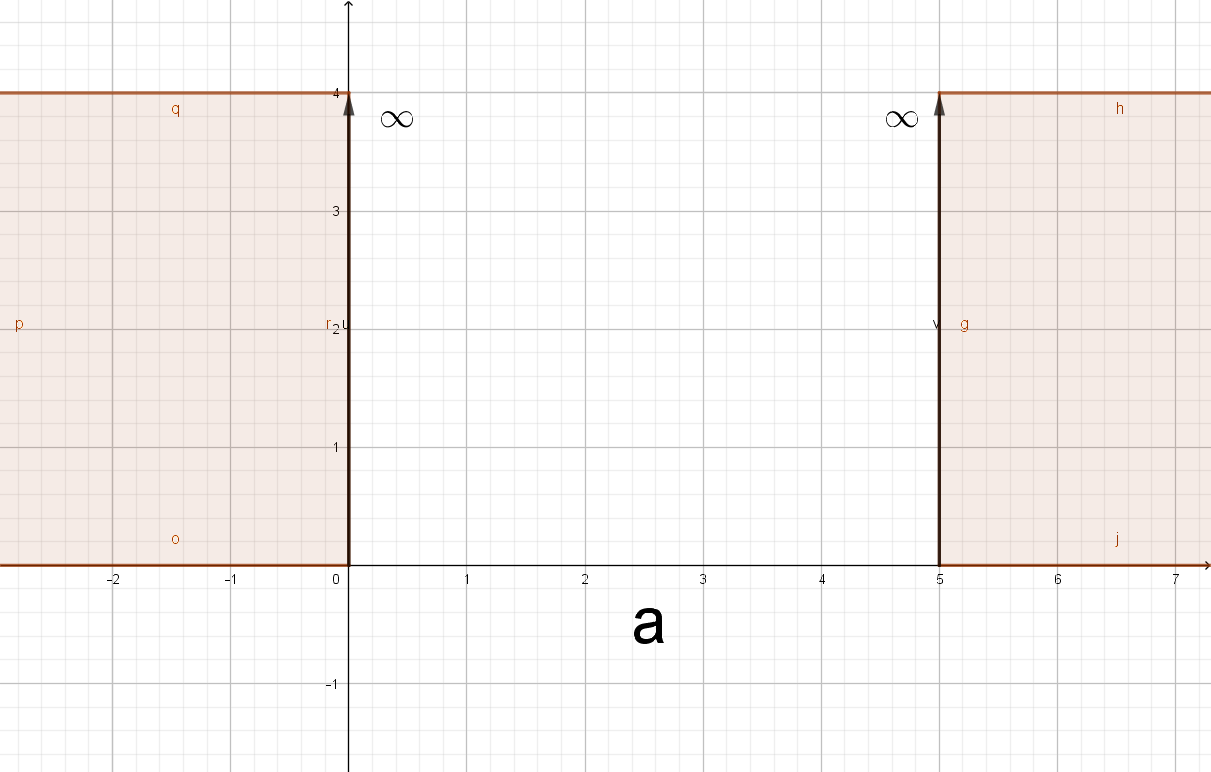

W obszarze $0 < x < a$ potencjał $V(x) = 0$, poza nim $V(x) = \infty$, co od razu implikuje, że elektron może przebywać tylko w obszarze $0 < x < a$.

W tym obszarze równanie Schrodingera w postaci niezależnej od czasu:

$$-\frac{\hbar^2}{2m}\frac{\partial^2 \psi(x)}{\partial x^2} = E\psi(x)$$

co możemy przekształcić do:

$$\frac{\partial^2 \psi(x)}{\partial x^2} = -\frac{2mE}{\hbar^2}\psi(x)$$

równanie to ma taką samą postać, jak równanie ruchu oscylatora harmonicznego: $\ddot{x} = -k x$ i jego ogólnym rozwiązaniem jest analogiczna jak w przypadku oscylatora funkcja:

$\psi(x) = c \sin(x + \delta)$, gdzie $c$ jest amplitudą a $\delta$ przesunięciem fazowym.

Aby znaleźć wartości $c$ i $\delta$ należy przyjrzeć się warunkom brzegowym. W punktach $x=0$ i $x=a$ funkcja falowa $\psi$ powinna wynosić 0, co prowadzi nas do 2 równań.

$$
\left \{\begin{array}{ll}
c \sin(\delta) = 0\\
c \sin(kx + \delta) = 0
\end{array}
\right.
$$

z równania 1. wyliczamy, że $\delta = 0$. Równanie 2 ma nieskończenie wiele rozwiązań: równość $\sin(ka) = 0$ jest spełniona dla wszystkich $k = \frac{n\pi}{a}$, gdzie $n \in \mathbb{Z} \setminus \{ 0 \}$ (przypadek $n = 0$ odrzucamy, bo odpowiadałby $\psi(x) = 0$).

Wartość $c$ znajdziemy żądając aby całkowite prawdopodobieństwo znalezienia elektronu w obszarze studni wynosiło 1:

$$1 = \int_0^a \psi^\ast(x)\psi(x)dx$$

gdzie $\psi^\ast(x)$ oznacza sprzężenie zespolone (https://pl.wikipedia.org/wiki/Sprz%C4%99%C5%BCenie_zespolone) $\psi(x)$

to prowadzi nas do:

$$1 = \int_0^a {c_n}^2 \sin^2(\frac{n\pi}{a} x)dx$$

$$1 = {c_n}^2\frac{a}{2}$$

$${c_n}^2 = {c_n}^\ast \cdot c_n = \frac{2}{a}$$

Ponieważ w ogólności $\psi(x)$ jest funkcją zespoloną, $c_n = \sqrt{\frac{2}{a}} \exp(i\alpha)$, gdzie $\exp(i\alpha)$ jest czynnikiem fazowym. Wymnożenie $c_n$ przez jego sprzężenie zespolone: 

$${c_n}^\ast \cdot c_n = \frac{2}{a} \exp(i\alpha)\cdot\exp(-i\alpha) = \frac{2}{a} \exp(0) = \frac{2}{a}$$ 

usuwa czynnik fazowy.

Ponieważ czynnik fazowu nie zmienia stanu fizycznego opisywanego przez funkcję $\psi(x)$, można go opuścić, co prowadzi do:

$$\psi_n(x) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a} x\right)$$

#### Zwizualizujemy teraz rozwiązania równania

In [23]:
def psi_n(x,n,a):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

def psi_n2(x,n,a):
    return psi_n(x,n,a)**2

In [24]:
def plot_psi(n=1,a=1.0):
    xarr = np.linspace(0,a,100)
    yarr = psi_n(xarr,n,a)
    yarr2 = psi_n2(xarr,n,a)
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0})
    axs[0].set_ylabel('$\psi(x)$')
    axs[1].set_ylabel('$\psi(x)^2$')
    axs[0].plot(xarr, yarr)
    axs[1].plot(xarr, yarr2)

In [29]:
interact(plot_psi, n=widgets.IntSlider(min=1, max=20, step=1), a=fixed(1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_psi(n=1, a=1.0)>

Wyliczymy teraz energie dla $n$-tej funkcji falowej: $E_n$

Lewa strona równania: $\frac{\partial^2 \psi_n(x)}{\partial x^2} = -\frac{2mE_n}{\hbar^2}\psi_n(x)$ po zastosowaniu wyprowadzonego powyżej wyrażenia na $\psi_n(x)$ wygląda następująco:

$$\frac{\partial^2 \psi_n(x)}{\partial x^2} = \frac{\partial}{\partial x}\frac{\partial \psi_n(x)}{\partial x} = \frac{\partial}{\partial x} \frac{\partial}{\partial x} \left( \right) = \sqrt{\frac{2}{a}} \sin \left({\frac{n\pi}{a} x} \right) = \\ = \frac{\partial}{\partial x}\left( \sqrt{\frac{2}{a}} \frac{n\pi}{a} \cos\left({\frac{n\pi}{a} x} \right) \right) = \\ = - \sqrt{\frac{2}{a}} \left( \frac{n\pi}{a} \right)^2 \sin{\left({\frac{n\pi}{a} x} \right)} = \\ = -\left( \frac{n\pi}{a} \right)^2 \psi_n(x)$$


Co prowadzi do:

$$-\left( \frac{n\pi}{a} \right)^2 \psi_n(x) = -\frac{2mE_n}{\hbar^2}\psi_n(x) $$

$$E_n = \frac{\hbar^2}{2m} \left( \frac{n\pi}{a} \right)^2$$ 

Taka postać wyrażenia na energię prowadzi do kilku istotnych dla nas wniosków:

* ponieważ przypadek $n=0$ odrzuciliśmy jako niefizyczny, energia cząstki jest zawsze $> 0$
* energia rośnie z kwadratem $n$ - poziomy energetyczne nie są równoodległe.
* energia elektronu jest odwrotnie proporcjonalna do kwadratu szerokości studni potencjału.

Pomimo, że nieskończona studnia potencjału jest modelem nierealistycznym - bardzo daleko idącym uproszczeniem rzeczywistej sytuacji - pozwala opisać np. zależność koloru związków posiadających łańcuchy wiązań sprzężonych: https://pl.wikipedia.org/wiki/Sprz%C4%99%C5%BCone_wi%C4%85zania_wielokrotne#Elektrony_%D0%BF_polien%C3%B3w_w_studni_potencja%C5%82u